<a href="https://colab.research.google.com/github/AlexandreXavierMartins/ProblemaDaMochila/blob/main/GA_Mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ypstruct

Melhorou
struct({'id': [0, 0, 0, 0, 1, 0, 1, 0], 'fo': 7})
Melhorou
struct({'id': [0, 1, 0, 0, 0, 0, 1, 1], 'fo': 12})
struct({'id': [1, 0, 0, 0, 0, 0, 1, 0], 'fo': 9})
Melhorou
struct({'id': [1, 0, 1, 0, 0, 1, 1, 0], 'fo': 14})
struct({'id': [1, 0, 1, 0, 0, 0, 0, 0], 'fo': 6})
struct({'id': [1, 1, 0, 1, 0, 0, 1, 1], 'fo': 0})
struct({'id': [1, 1, 0, 1, 0, 1, 1, 1], 'fo': -1})
struct({'id': [0, 1, 1, 1, 1, 1, 0, 1], 'fo': 2})
struct({'id': [1, 1, 0, 1, 0, 1, 0, 1], 'fo': 6})
struct({'id': [0, 0, 0, 1, 1, 1, 1, 1], 'fo': 4})
struct({'id': [1, 0, 1, 0, 0, 1, 1, 0], 'fo': 14})
Geração  0
Melhorou
struct({'id': [1, 0, 0, 0, 0, 1, 1, 1], 'fo': 16})
Geração  1
Geração  2
Geração  3
Geração  4
Melhorou
struct({'id': [1, 1, 1, 0, 0, 1, 1, 0], 'fo': 17})
Geração  5
Geração  6
Geração  7
Geração  8
Geração  9
Média =  17.0


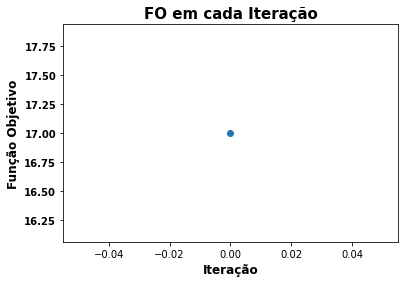

In [20]:

import numpy as np
import math
import matplotlib.pyplot as plt
from ypstruct import structure

def calcula_fo(b, p, s, n, cap, pena):
  fo = 0
  pt = 0
  for i in range(n):
    fo = fo + s[i]*b[i]
    pt = pt + s[i]*p[i]
  if pt > cap:
    #print('Solução inviável')
    fo = fo -pena*(pt - cap)
  return fo

def gera_sol(s, n, taxa):
  for i in range(n):
    x = np.random.random()
    if x < taxa:
      s[i] = 1
  return s

#Primeira metade do p1 e segunda de p2
def crossover(p1, p2, n):
  filho = p2.deepcopy()
  for i in range(n//2):
    filho.id[i] = p1.id[i]
  return filho


#DADOS DO PROBLEMA-------------------#
n = 8 #Quantidade de objetos
beneficio = [4, 3, 2, 6, 2, 3, 5, 4]
peso =      [5, 4, 3, 9, 4, 2, 6, 7]
cap = 20 #Capacidade da mochila
#------------------------------------#
#ESTATÍSTICAS------------------------#
fo_inicial = []
fo_final = []
xlabel = []
media = 0
#------------------------------------#
#PARÂMETROS--------------------------#
penalidade = 2 #Penalidade por solução inviável
taxa = 0.5    #Taxa para gerar sol. inicial, deve ser entre (0,1)
maxit = 10
npop = 10
mutation = 0.05
#------------------------------------#

experimentos = 1
#Estrutura da Solução
cromossomo = structure()
cromossomo.id = None #Vetor com a solução que pode ser localizada pelo id
cromossomo.fo = None #Função objetivo de cada solução

for seed in range(experimentos):
  xlabel.append(seed)
  np.random.seed(seed)
  #Geração Inicial
  pop = cromossomo.repeat(npop) #Cria npop indivíduos
  #Cria um indivíduo que guarda a melhor solução
  bestsol = cromossomo
  bestsol.id = n*[0]
  bestsol.fo = -np.inf
  for i in range(npop):
    pop[i].id = n*[0]
    pop[i].id = gera_sol(pop[i].id, n, taxa) 
    pop[i].fo = calcula_fo(beneficio, peso, pop[i].id, n, cap, penalidade)
    if pop[i].fo > bestsol.fo:
      print('Melhorou')
      bestsol = pop[i].deepcopy()
    print(pop[i])
  #print(pop)
  print(bestsol)
  #LOOP
  for it in range(maxit):
    #Cruzamento
    print('Geração ', it)
    popc = []
    for _ in range(npop//2):
      #Seleciona Pais
      per = np.random.permutation(npop) #Pegar os 2 primeiros
      #print(per)
      #print(pop[per[0]])
      #print(pop[per[1]])
      filho1 = crossover(pop[per[0]], pop[per[1]], n)
      filho2 = crossover(pop[per[1]], pop[per[0]], n)
      #print(filho1)
      #print(filho2)
      #Mutação
      for i in range(n):
        x = np.random.uniform(0, 1)
        if x < mutation:
          filho1.id[i] = 1 - filho1.id[i]
        x = np.random.uniform(0, 1)
        if x < mutation:
          filho2.id[i] = 1 - filho2.id[i]    
      #Fim da mutação
      #Calcula a FO e add na população
      filho1.fo = calcula_fo(beneficio, peso, filho1.id, n, cap, penalidade)
      filho2.fo = calcula_fo(beneficio, peso, filho2.id, n, cap, penalidade)
      popc.append(filho1)
      popc.append(filho2)
      #print(filho1)
      #print(filho2)
    #Fim do Cruzamento e Mutação

    #Junta, Ordena e Seleciona
    pop = pop+popc
    pop = sorted(pop, key=lambda x: x.fo, reverse = True)
    pop = pop[0:npop]
    #print(pop[0])
    if pop[0].fo > bestsol.fo:
      print('Melhorou')
      bestsol = pop[0].deepcopy()
      print(bestsol)


  
  media = media + bestsol.fo
  fo_final.append(bestsol.fo)

media = media/experimentos
#print('Melhor solução = ', fo_star)
#print('Melhor iteração =', best_iter)
print('Média = ', media)
#plt.scatter(xlabel, fo_inicial)
plt.scatter(xlabel, fo_final)
plt.title("FO em cada Iteração", fontsize = 15, fontweight = 'bold')
plt.xlabel("Iteração", fontsize = 12, fontweight = 'bold')
plt.ylabel("Função Objetivo", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight='bold')
plt.show()
